In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import keras

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Activation, Normalization, Discretization

from sklearn.preprocessing import MinMaxScaler

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read in data tables
law=pd.read_csv('lawler.csv')
game=pd.read_csv('games.csv')

pd.options.display.max_columns = 100

#prepare data types to produce unique key
law['HomeTeamId'] = law['HomeTeamId'].astype(str)
law['VisitorTeamId'] = law['VisitorTeamId'].astype(str)

game['HOME_TEAM_ID'] = game['HOME_TEAM_ID'].astype(str)
game['VISITOR_TEAM_ID'] = game['VISITOR_TEAM_ID'].astype(str)

#produce key to join two dataframes
law['Game ID'] = law['GameDate']+law['HomeTeamId']+law['VisitorTeamId']
game['Game ID'] = game['GAME_DATE_EST']+ game['HOME_TEAM_ID'] + game['VISITOR_TEAM_ID']

#merge into singular datframe
law=law.merge(game, on = 'Game ID')

In [3]:
#drop unnecessary columns
todrop=['Game ID', 'GAME_ID', 'LawlerTeamId','GAME_DATE_EST','Time_Elapsed pct of game']
law.drop(todrop, axis=1, inplace=True)

In [4]:

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer=imputer.fit(law[['LawlerTimeElapsed']])
law['LawlerTimeElapsed']= imputer.transform(law[['LawlerTimeElapsed']])


In [5]:
#identify data and target
X = law.iloc[:,8:len(law)]
y = law.iloc[:, 5]

In [6]:
#split into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [9]:
rf.score(X_test, y_test)

0.9880461665292662

In [18]:
np.set_printoptions(precision=6, suppress=True)
param_grid = {'max_features': [4,8,12,16],
              'max_depth': [6,8,10,12]}
param_grid

{'max_features': [4, 8, 12, 16], 'max_depth': [6, 8, 10, 12]}

In [19]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(rf, param_grid=param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'max_features': [4, 8, 12, 16]},
             return_train_score=True)

In [22]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.3093,0.0575,0.0375,0.0040,6,4,"{'max_depth': 6, 'max_features': 4}",0.9134,0.9129,0.9186,0.9134,0.9124,0.9114,0.9113,0.9196,0.9139,0.9201,0.9147,0.0032,16,0.9188,0.9190,0.9188,0.9161,0.9198,0.9181,0.9191,0.9178,0.9184,0.9180,0.9184,9.6923e-04
1,1.9830,0.0962,0.0355,0.0011,6,8,"{'max_depth': 6, 'max_features': 8}",0.9717,0.9464,0.9562,0.9480,0.9650,0.9562,0.9479,0.9582,0.9515,0.9531,0.9554,0.0076,15,0.9752,0.9532,0.9596,0.9548,0.9657,0.9601,0.9502,0.9612,0.9601,0.9575,0.9598,6.6328e-03
2,2.6523,0.0772,0.0392,0.0100,6,12,"{'max_depth': 6, 'max_features': 12}",0.9598,0.9727,0.9691,0.9732,0.9804,0.9789,0.9670,0.9763,0.9706,0.9696,0.9718,0.0057,13,0.9550,0.9758,0.9674,0.9762,0.9815,0.9777,0.9673,0.9772,0.9732,0.9679,0.9719,7.3034e-03
3,3.2849,0.1047,0.0352,0.0015,6,16,"{'max_depth': 6, 'max_features': 16}",0.9717,0.9650,0.9706,0.9567,0.9768,0.9794,0.9804,0.9784,0.9753,0.9722,0.9726,0.0069,12,0.9663,0.9705,0.9675,0.9595,0.9809,0.9788,0.9781,0.9804,0.9786,0.9707,0.9731,6.9195e-03
4,1.4818,0.0491,0.0404,0.0033,8,4,"{'max_depth': 8, 'max_features': 4}",0.9541,0.9526,0.9583,0.9624,0.9670,0.9588,0.9582,0.9598,0.9495,0.9572,0.9578,0.0047,14,0.9678,0.9633,0.9675,0.9743,0.9782,0.9703,0.9675,0.9657,0.9650,0.9720,0.9692,4.3482e-03
5,2.2840,0.1604,0.0394,0.0047,8,8,"{'max_depth': 8, 'max_features': 8}",0.9861,0.9835,0.9892,0.9856,0.9851,0.9851,0.9876,0.9845,0.9845,0.9866,0.9858,0.0016,8,0.9860,0.9863,0.9859,0.9860,0.9861,0.9861,0.9861,0.9861,0.9861,0.9859,0.9861,9.9300e-05
6,2.9530,0.0627,0.0363,0.0006,8,12,"{'max_depth': 8, 'max_features': 12}",0.9861,0.9835,0.9892,0.9856,0.9851,0.9851,0.9876,0.9845,0.9851,0.9866,0.9858,0.0015,1,0.9859,0.9863,0.9856,0.9861,0.9860,0.9861,0.9859,0.9861,0.9861,0.9860,0.9860,1.8653e-04
7,3.6410,0.0770,0.0365,0.0014,8,16,"{'max_depth': 8, 'max_features': 16}",0.9861,0.9835,0.9892,0.9856,0.9851,0.9851,0.9876,0.9845,0.9851,0.9866,0.9858,0.0015,1,0.9862,0.9863,0.9859,0.9861,0.9864,0.9863,0.9859,0.9864,0.9864,0.9861,0.9862,1.7261e-04
8,1.7904,0.2188,0.0641,0.0442,10,4,"{'max_depth': 10, 'max_features': 4}",0.9794,0.9753,0.9784,0.9789,0.9809,0.9748,0.9778,0.9784,0.9809,0.9789,0.9784,0.0019,11,0.9841,0.9840,0.9851,0.9853,0.9868,0.9857,0.9836,0.9857,0.9868,0.9856,0.9853,1.0442e-03
9,2.8566,0.2960,0.0482,0.0089,10,8,"{'max_depth': 10, 'max_features': 8}",0.9861,0.9835,0.9892,0.9856,0.9851,0.9851,0.9876,0.9845,0.9851,0.9866,0.9858,0.0015,1,0.9869,0.9871,0.9865,0.9867,0.9868,0.9869,0.9864,0.9868,0.9867,0.9867,0.9867,1.8808e-04


In [23]:
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_max_depth', columns='param_max_features')
pd.set_option("display.precision",4)
res = res.set_index(res.index.values.round(4))

In [14]:
res

param_max_features,4,8,12,16
6,0.9158,0.9582,0.9740,0.9712
8,0.9576,0.9858,0.9858,0.9858
10,0.9799,0.9858,0.9858,0.9858


In [24]:
grid.best_params_

{'max_depth': 8, 'max_features': 12}

In [25]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
RandomForestClassifier(max_depth=8, max_features=12)


In [28]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.3f}'.format(grid.__class__.__name__, accuracy))

Accuracy score of the GridSearchCV is 0.989


<AxesSubplot:xlabel='param_max_features'>

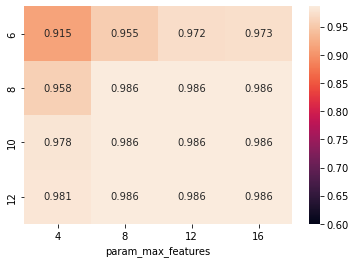

In [27]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)